In [1]:
!pip3 install -r requirements.txt

  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 3.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Using cached contourpy-1.2.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (305 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached pillow-10.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 4.6 MB/s eta 0:00:00 MB/s eta 0:00:01


In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [4]:
iris_data = load_iris()

In [6]:
iris_data.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)

In [11]:
print("Train size: ", X_train.shape, y_train.shape)
print("test size", X_test.shape, y_test.shape)

Train size:  (120, 4) (120,)
test size (30, 4) (30,)


In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [14]:
gnb.class_prior_

array([0.35      , 0.31666667, 0.33333333])

In [15]:
gnb.class_count_

array([42., 38., 40.])

In [16]:
gnb.class_count_[0] / gnb.class_count_.sum()

0.35

In [17]:
train_preds = gnb.predict(X_train)
test_preds = gnb.predict(X_test)

In [19]:
print("Accuracy of train: ", accuracy_score(y_train, train_preds))
print("Accuracy of test: ", accuracy_score(y_test, test_preds))

Accuracy of train:  0.9666666666666667
Accuracy of test:  0.9333333333333333


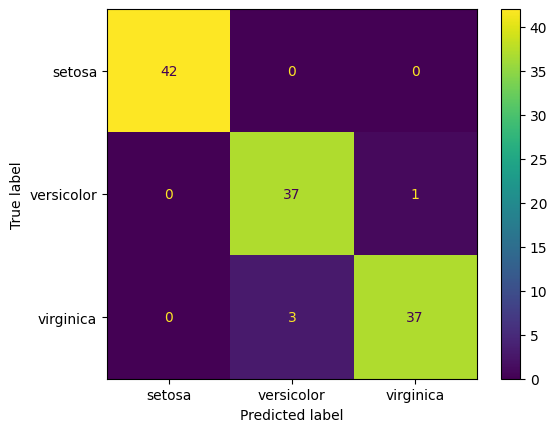

In [22]:
train_cm = confusion_matrix(y_train, train_preds)
train_cm_disp = ConfusionMatrixDisplay(train_cm, display_labels=iris_data.target_names).plot()